 # Tarea 5.5 #
 ### Moisés Echeverría ###
 #### FIS1344 - Métodos númericos y probabilidades ####

Ejercicio sacado de "Basic Probability Theory", R. B. Ash, Dover, 1970.

De las 100 personas de una aldea, 50 siempre dicen la verdad, 30 siempre mienten y 20 siempre se niegan a responder. Se toma una muestra de 30 personas sin reemplazo. Encuentre la probabilidad de que esta muestra contenga 10 personas de cada categoría.

Para resolver este ejercicio es necesario hacer una simulación estilo Monte Carlo ya que el número de elementos en el espacio de resultados es demasiadoo grande. Estime el error cometido al hacer el cálculo de esta manera y obtenga un error razonable.

In [35]:
import random
import matplotlib.pyplot as plt
import numpy as np
random.seed(10)

In [2]:
Total={'V'+str(i) for i in range (1,51)}|{'M'+str(i) for i in range (1,31)}|{'N'+str(i) for i in range (1,21)}
#Creamos un diccionario que tiene los datos de la aldea que nos dan en el problema


In [3]:
#Definimos una función que evalua si los elementos del diccionario cumplen con nuestra condición
#de tener 10 de cada grupo
def tomar_diez(evento):
    Prueba=[i[0] for i in evento] # hacemos un ciclo que tome las letras que nos importan 
    return(Prueba.count('V')==10 & Prueba.count('M')==10 & Prueba.count('N')==10)
    

In [4]:
#Hacemos un diccionario con el resultado para realizar una prueba de nuestra función
#y comprobamos que si cumple la condición nos arroja un True
prueba={'V'+str(i) for i in range (1,11)}|{'M'+str(i) for i in range (1,11)}|{'N'+str(i) for i in range (1,11)}
tomar_diez(prueba)

True

In [18]:
n=1000000
Tomar_datos={tuple(random.choices(list(Total),k=30)) for i in range(n)}
#Hacemos tuplas que tomen un valor aleatorio del total de la aldea,tomando 30 datos en total 
#y hacemos un ciclo que repita este proceso una n cantidad de veces

Caso_ideal={j for j in Tomar_datos if tomar_diez(j)}
#Evaluamos los casos para obtener el resultado que queremos, que es 10 de cada grupo

Prob= len(Caso_ideal & Tomar_datos )/len(Tomar_datos)
#y calculamos la probabilidad de que nuestro caso ideal se cumpla dentro de todos los casos posibles
print(f'La probabilidad de obtener 10 de cada grupo seleccionando 30 aldeanos es {Prob} con una cantidad {n} de repeticiones')
print('este no es el valor real, pero si hacemos este experimento con un mayor número de repeticiones colapsaría nuestro programa')
print('por tanto necesitamos hacer varias simulaciones para acercarnos al valor real sin colapsar nuestro computador')

La probabilidad de obtener 10 de cada grupo seleccionando 30 aldeanos es 0.00334 con una cantidad 1000000 de repeticiones
este no es el valor real, pero si hacemos este experimento con un mayor número de repeticiones colapsaría nuestro programa
por tanto necesitamos hacer varias simulaciones para acercarnos al valor real sin colapsar nuestro computador


In [82]:
rep=1000000 #igual que antes es la cantidad de datos que tomaremos
simulaciones=100 #y este número sera la cantidad de veces que realizaremos el experimento

Probabilidad=np.zeros(simulaciones) #Creamos una matriz para almacenar los resultados de las probabilidades

for n in range(simulaciones): # hacemos el mismo proceso que arriba,pero esta vez hacemos un ciclo para que repita la simulación
    datos={tuple(random.choices(list(Total),k=30)) for i in range(rep)}
    ideal={j for j in datos if tomar_diez(j)}
    Probabilidad[n]= len(ideal & datos )/len(datos)
    
Promedio=round(Probabilidad.mean(),5) #Calculamos el promedio de esta matriz redondeando al 5° decimal
Desviación_estandar=round(Probabilidad.std(),5) #Calculamos la desviacion estandar 
error=round(Desviación_estandar/Promedio,5) # calculamos el error que obtenemos de esta aproximación

In [83]:
print(f'La probabilidad de obtener nuestro caso favorable es de',Promedio,'±',error,'utilizando 100 simulaciones de',rep,'repeticiones')

La probabilidad de obtener nuestro caso favorable es de 0.0033 ± 0.01818 utilizando 100 simulaciones de 1000000 repeticiones


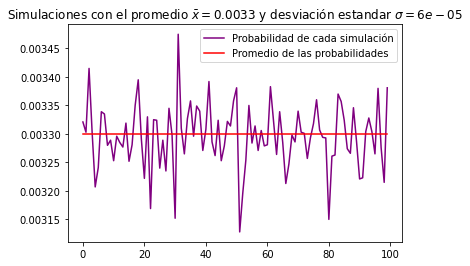

In [84]:
plt.title('Simulaciones con el promedio $\\bar{x}='+str(Promedio)+'$ y desviación estandar $\sigma='+str(Desviación_estandar)+'$')
plt.plot(np.arange(100),Probabilidad,label='Probabilidad de cada simulación',color='purple')
plt.plot(np.arange(100),np.full(simulaciones,Promedio),label='Promedio de las probabilidades',color='red')
plt.legend()